#Procesamiento
import pandas as pd
import numpy as np
import datetime as dt
#import missingno as msno

#Visualización
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

## Carga de datos

In [7]:
df = pd.read_csv('./dataset/android-games.csv')

df.head(7)

,Date,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid
0,1/1/2020,1,Garena Free Fire- World Series,86273129,500.0 M,4.0,2.1,6.9,0.0,GAME ACTION,63546766,4949507,3158756,2122183,12495915,False
1,1/2/2020,2,PUBG MOBILE - Traverse,37276732,500.0 M,4.0,1.8,3.6,0.0,GAME ACTION,28339753,2164478,1253185,809821,4709492,False
2,1/3/2020,3,Mobile Legends: Bang Bang,26663595,100.0 M,4.0,1.5,3.2,0.0,GAME ACTION,18777988,1812094,1050600,713912,4308998,False
3,1/4/2020,4,Brawl Stars,17971552,100.0 M,4.0,1.4,4.4,0.0,GAME ACTION,13018610,1552950,774012,406184,2219794,False
4,1/5/2020,5,Sniper 3D: Fun Free Online FPS Shooting Game,14464235,500.0 M,4.0,0.8,1.5,0.0,GAME ACTION,9827328,2124154,1047741,380670,1084340,False
5,1/6/2020,6,Call of Duty®: Mobile - Season 4: Spurned & Bu...,13572148,100.0 M,4.0,2.0,4.0,0.0,GAME ACTION,10501443,1274162,517273,268489,1010778,False
6,1/7/2020,7,Among Us,11936964,100.0 M,3.0,1.8,5.6,0.0,GAME ACTION,5954262,1041297,853099,719378,3368926,True


In [ ]:
# Visualizamos datos -> .head() -> primeras 5 filas
# Visualizamos datos -> .tail() -> ultimas 5 filas
# si puede pasar n° de filas a visualizar .head(10)

## Análisis exploratorio

In [9]:
# General

# Visualizamos los valores nulos en -> "paid" y "average rating"
# Tipos de datos -> Date deberia tener un tipo de dato datetime para un mejor manejo.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1736 entries, 0 to 1735
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              1736 non-null   object 
 1   rank              1736 non-null   int64  
 2   title             1736 non-null   object 
 3   total ratings     1736 non-null   int64  
 4   installs          1736 non-null   object 
 5   average rating    1728 non-null   float64
 6   growth (30 days)  1736 non-null   float64
 7   growth (60 days)  1736 non-null   float64
 8   price             1736 non-null   float64
 9   category          1736 non-null   object 
 10  5 star ratings    1736 non-null   int64  
 11  4 star ratings    1736 non-null   int64  
 12  3 star ratings    1736 non-null   int64  
 13  2 star ratings    1736 non-null   int64  
 14  1 star ratings    1736 non-null   int64  
 15  paid              1729 non-null   object 
dtypes: float64(4), int64(7), object(5)
memory 

In [11]:
'''
describe()se utiliza para ver algunos detalles estadísticos básicos
count: el número de valores no vacíos.
mean - El valor promedio (media).
std - La desviación estándar.
min - el valor mínimo.
25% - El percentil 25%*.
50% - El percentil 50%*.
75% - El percentil 75%*.
max - el valor máximo.
'''

df.describe()

,rank,total ratings,average rating,growth (30 days),growth (60 days),price,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings
count,1736.000000,1.736000e+03,1728.00000,1736.000000,1736.000000,1736.000000,1.736000e+03,1.736000e+03,1.736000e+03,1.736000e+03,1.736000e+03
mean,50.220046,1.110679e+06,3.90625,320.626187,122.139113,0.010904,7.964405e+05,1.189283e+05,5.870517e+04,2.824129e+04,1.083608e+05
std,29.025100,3.988018e+06,0.29551,6008.527713,2250.002200,0.214616,2.948668e+06,3.232236e+05,1.668288e+05,9.569178e+04,5.046927e+05
min,1.000000,3.299300e+04,2.00000,0.000000,0.000000,0.000000,1.397500e+04,2.451000e+03,7.180000e+02,2.660000e+02,5.450000e+02
25%,25.000000,1.742272e+05,4.00000,0.100000,0.200000,0.000000,1.268265e+05,2.056625e+04,9.609000e+03,4.235000e+03,1.265300e+04
50%,50.000000,4.276935e+05,4.00000,0.500000,1.000000,0.000000,2.957355e+05,5.085100e+04,2.494450e+04,1.061450e+04,3.359650e+04
75%,75.000000,8.837410e+05,4.00000,1.700000,3.300000,0.000000,6.184412e+05,1.016020e+05,5.208700e+04,2.320825e+04,8.010575e+04
max,100.000000,8.627313e+07,4.00000,227105.700000,69441.400000,7.490000,6.354677e+07,5.404966e+06,3.158756e+06,2.122183e+06,1.249592e+07


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
rank,1736.0,5.022005e+01,2.902510e+01,1.0,25.00,50.0,75.00,100.00
total ratings,1736.0,1.110679e+06,3.988018e+06,32993.0,174227.25,427693.5,883741.00,86273129.00
average rating,1728.0,3.906250e+00,2.955102e-01,2.0,4.00,4.0,4.00,4.00
growth (30 days),1736.0,3.206262e+02,6.008528e+03,0.0,0.10,0.5,1.70,227105.70
growth (60 days),1736.0,1.221391e+02,2.250002e+03,0.0,0.20,1.0,3.30,69441.40
price,1736.0,1.090438e-02,2.146162e-01,0.0,0.00,0.0,0.00,7.49
5 star ratings,1736.0,7.964405e+05,2.948668e+06,13975.0,126826.50,295735.5,618441.25,63546766.00
4 star ratings,1736.0,1.189283e+05,3.232236e+05,2451.0,20566.25,50851.0,101602.00,5404966.00
3 star ratings,1736.0,5.870517e+04,1.668288e+05,718.0,9609.00,24944.5,52087.00,3158756.00
2 star ratings,1736.0,2.824129e+04,9.569178e+04,266.0,4235.00,10614.5,23208.25,2122183.00


## Visualizaciones

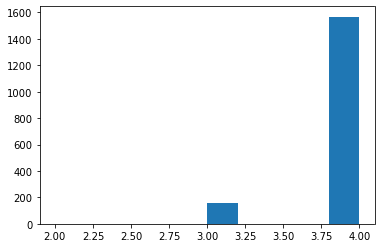

In [13]:
# Calificación

plt.hist(df['average rating']);

<AxesSubplot:xlabel='paid', ylabel='count'>

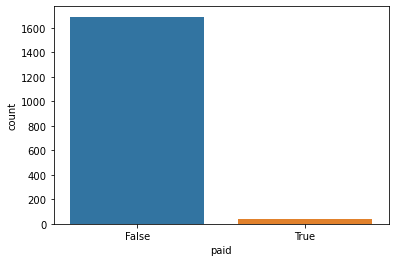

In [14]:
# Seaborn

sns.countplot(x='paid', data= df)

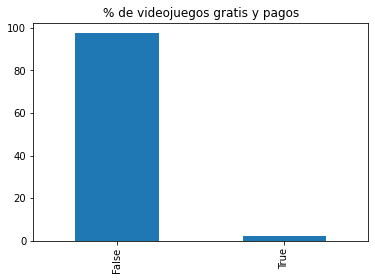

In [16]:
plot = (100 * df['paid'].value_counts() / len(df['paid'])).plot(
kind='bar', title='% de videojuegos gratis y pagos')

## Valores únicos de las categorias

In [17]:
# Podemos visualizar categorias iguales, pero en minusculas

'''
Observamos las siguientes categorías:
game action
game card
FICTION BOOK
BIOGRAPHY BOOK
'''

df['category'].unique()

array(['GAME ACTION', 'game action', 'GAME ADVENTURE', 'GAME ARCADE',
       'GAME BOARD', 'GAME CARD', 'game card', 'GAME CASINO',
       'GAME CASUAL', 'GAME EDUCATIONAL', 'GAME MUSIC', 'game music',
       'GAME PUZZLE', 'GAME RACING', 'GAME ROLE PLAYING',
       'GAME SIMULATION', 'GAME SPORTS', 'GAME STRATEGY', 'GAME TRIVIA',
       'GAME WORD', 'FICTION BOOK', 'BIOGRAPHY BOOK'], dtype=object)

## Valores únicos de fechas

In [18]:
# Podemos visualizar dos formatos diferentes de fechas

df['Date'].unique()

array(['1/1/2020', '1/2/2020', '1/3/2020', '1/4/2020', '1/5/2020',
       '1/6/2020', '1/7/2020', '1/8/2020', '1/9/2020', '1/10/2020',
       '1/11/2020', '1/12/2020', '1/13/2020', '1/14/2020', '1/15/2020',
       '1/16/2020', '1/17/2020', '1/18/2020', '1/19/2020', '1/20/2020',
       '1/21/2020', '1/22/2020', '1/23/2020', '1/24/2020', '1/25/2020',
       '1/26/2020', '1/27/2020', '1/28/2020', '1/29/2020', '1/30/2020',
       '1/31/2020', '2/1/2020', '2/2/2020', '2/3/2020', '2/4/2020',
       '2/5/2020', '2/6/2020', '2/7/2020', '2/8/2020', '2/9/2020',
       '2/10/2020', '2/11/2020', '2/12/2020', '2/13/2020', '2/14/2020',
       '2/15/2020', '2/16/2020', '2/17/2020', '2/18/2020', '2/19/2020',
       '2/20/2020', '2/21/2020', '2/22/2020', '2/23/2020', '2/24/2020',
       '2/25/2020', '2/26/2020', '2/27/2020', '2/28/2020', '2/29/2020',
       '3/1/2020', '3/2/2020', '3/3/2020', '3/4/2020', '3/5/2020',
       '3/6/2020', '3/7/2020', '3/8/2020', '3/9/2020', '3/10/2020',
       '3/11/2020',

## Valores únicos en la columna installs

In [19]:
'''
Los valores contienen letras que indican:

M: *1000000
k: *1000
'''

df['installs'].unique()

array(['500.0 M', '100.0 M', '50.0 M', '10.0 M', '5.0 M', '1.0 M',
       '1000.0 M', '500.0 k', '100.0 k'], dtype=object)